In [1]:
import numpy as np


In [2]:
# Define discrete 2D states S,S'
GRID_WORLD = np.zeros((5,5))

# Discount Factor
GAMMA = 0.9

GRID_WORLD


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [3]:
# Define Actions (A) --> North, South, East, West 
actions = [[-1,0], [1,0], [0,-1], [0,1]]

In [4]:
Q = np.zeros((GRID_WORLD.shape[0],GRID_WORLD.shape[1],len(actions)))

In [5]:
def epsilon_greedy(Q, epsilon = 0.7):
    epsilon_rnd = np.random.uniform()
    if epsilon_rnd < epsilon:
        argmax = np.argmax(Q)
        return actions[argmax], argmax
    else:
        rand_index = np.random.choice(np.array(actions).shape[0])
        return actions[rand_index], rand_index


In [6]:
def env_step(state_id, action):

    prime_state_id = state_id + action
    termination = False
    
    if (prime_state_id < 0).any() or (prime_state_id > 4).any():
        reward_t = -1
        prime_state_id = state_id
                        
    elif (state_id == [0,1]).all():
        reward_t = +10
        prime_state_id = [4,1]
        termination = True

    elif (state_id == [0,3]).all():
        reward_t = +5
        prime_state_id = [2,3]
        termination = True

    else:
        reward_t = 0
        
    return reward_t, prime_state_id, termination


In [7]:
def update_rule(Q, state_id,prime_state_id,action_idx, prime_action_idx,reward,termination, a = 0.03, gamma = 0.9):
    
    Q_sp_ap = Q[prime_state_id[0],prime_state_id[1],prime_action_idx]
    Q_s_a = Q[state_id[0],state_id[1],action_idx]
    
    Q_s_a =  Q_s_a + a*(reward + gamma*Q_sp_ap - Q_s_a)
    
    Q[state_id[0],state_id[1],action_idx] = Q_s_a
    
    return Q

In [8]:
# Iterative process, so we will run it for 10 times
# If this was some other higher dimensional, or continuous space, this would require a lot more iterations
# This number can range in the millions 

episodes = int(1e4)
timesteps = 25
termination = False
truncation = False

for episode in range(episodes):
    
    i = np.random.choice(GRID_WORLD.shape[0]) 
    j = np.random.choice(GRID_WORLD.shape[1])    
   
    state_id = np.array((i,j))

    
    for timestep in range(timesteps):
        
        if i == timesteps-1:
            truncation = False

        action, action_idx = epsilon_greedy(Q[state_id[0],state_id[1],:], 
                                            epsilon = 0.7)
        
        reward, prime_state_id, termination = env_step(state_id=state_id, action=action)
        
        action_prime, prime_action_idx = epsilon_greedy(Q=Q[prime_state_id[0],prime_state_id[1],:], 
                                                        epsilon=0.7)
        
        Q = update_rule(Q=Q,state_id=state_id,
                        prime_state_id=prime_state_id,
                        action_idx=action_idx,
                        prime_action_idx=prime_action_idx,
                        reward=reward,
                        termination = termination)
        
        state_id = np.array(prime_state_id)
        
        
        if termination or truncation:
            break
                        

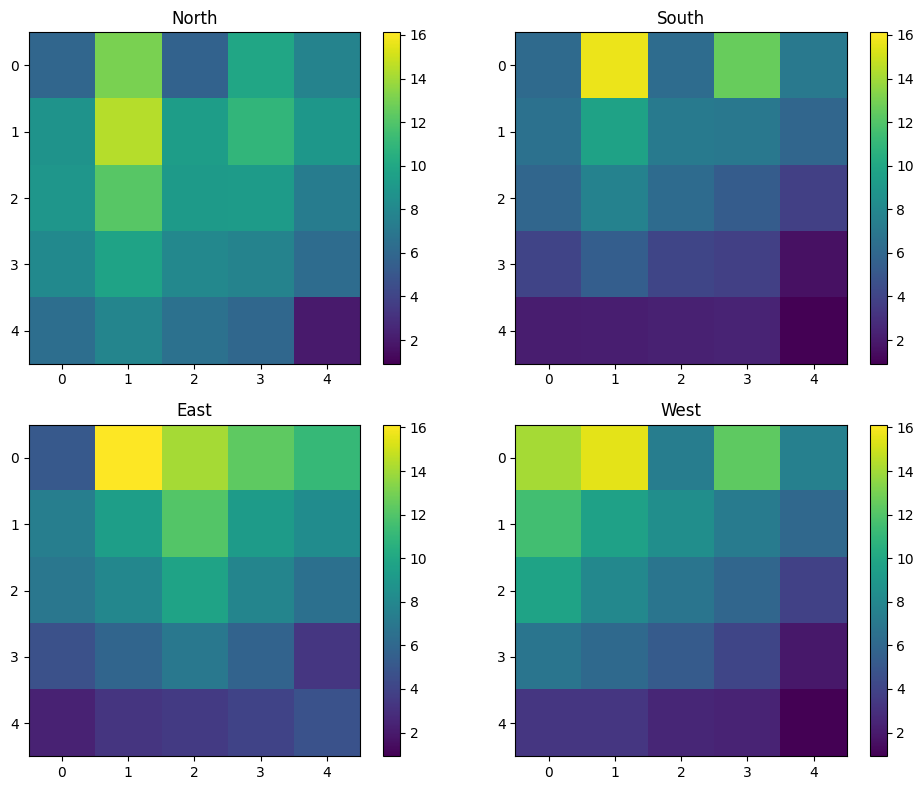

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Q1 = Q[:, :, 0]
Q2 = Q[:, :, 1]
Q3 = Q[:, :, 2]
Q4 = Q[:, :, 3]

vmin = Q.min()
vmax = Q.max()

# Create subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# First subplot (top left)
im1 = axes[0, 0].imshow(Q1, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[0, 0].set_title("North")
plt.colorbar(im1, ax=axes[0, 0])

# Second subplot (top right)
im2 = axes[0, 1].imshow(Q2, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[0, 1].set_title("South")
plt.colorbar(im2, ax=axes[0, 1])

# Third subplot (bottom left)
im3 = axes[1, 0].imshow(Q3, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[1, 0].set_title("East")
plt.colorbar(im3, ax=axes[1, 0])

# Fourth subplot (bottom right)
im4 = axes[1, 1].imshow(Q4, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[1, 1].set_title("West")
plt.colorbar(im4, ax=axes[1, 1])

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
episodes = int(1)
timesteps = 25
termination = False
truncation = False

for episode in range(episodes):
    
    i = np.random.choice(GRID_WORLD.shape[0]) 
    j = np.random.choice(GRID_WORLD.shape[1])    
   
    state_id = np.array((i,j))
    plot_states = []
    plot_states.append(state_id)

    
    for i, timestep in enumerate(range(timesteps)):
        
        action, action_idx = epsilon_greedy(Q[state_id[0],state_id[1],:], 
                                            epsilon = 1)
        
        reward, prime_state_id, termination = env_step(state_id=state_id, action=action)
                
        state_id = np.array(prime_state_id)
        plot_states.append(state_id)

        
        if i == timesteps-1:
            truncation = False

        
        if termination or truncation:
            print("Total timesteps: ", i)
            print("Final reward: ", reward)

            break
        

Total timesteps:  3
Final reward:  5


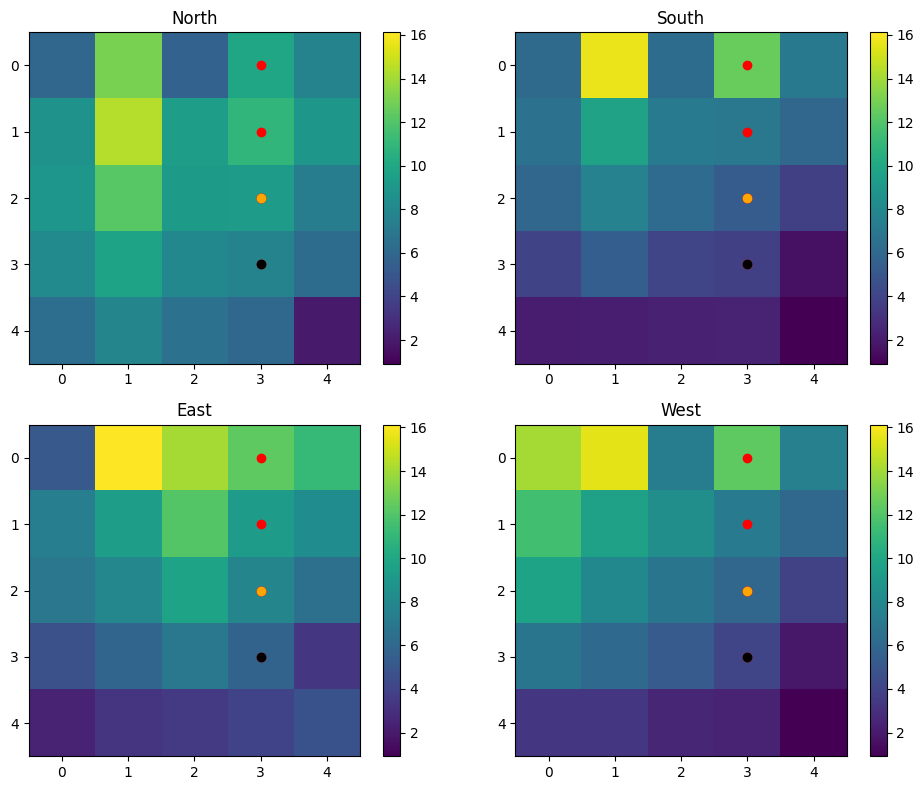

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Q1 = Q[:, :, 0]
Q2 = Q[:, :, 1]
Q3 = Q[:, :, 2]
Q4 = Q[:, :, 3]

plot_states = np.array(plot_states)

vmin = Q.min()
vmax = Q.max()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

im1 = axes[0, 0].imshow(Q1, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[0, 0].set_title("North")
plt.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].imshow(Q2, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[0, 1].set_title("South")
plt.colorbar(im2, ax=axes[0, 1])

im3 = axes[1, 0].imshow(Q3, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[1, 0].set_title("East")
plt.colorbar(im3, ax=axes[1, 0])

im4 = axes[1, 1].imshow(Q4, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
axes[1, 1].set_title("West")
plt.colorbar(im4, ax=axes[1, 1])


axes = axes.flatten()

for ax in axes:
    ax.scatter(x=plot_states[:, 1], y=plot_states[:, 0], color="red")  # Scatter all points in red
    ax.scatter(x=plot_states[0, 1], y=plot_states[0, 0], color="black")  # Single black point
    ax.scatter(x=plot_states[-1, 1], y=plot_states[-1, 0], color="orange")  # Single black point


# Display the plot
plt.tight_layout()
plt.show()


In [12]:
plot_states[:,0]
plot_states[:,1]

array([3, 3, 3, 3, 3])

In [13]:
plot_states

array([[3, 3],
       [2, 3],
       [1, 3],
       [0, 3],
       [2, 3]])

In [14]:
np.array(plot_states)

array([[3, 3],
       [2, 3],
       [1, 3],
       [0, 3],
       [2, 3]])